# Report on US-Healthcare Databas with Stastistical Analysis 

Health searches data contains the statistics of google searches made in US. 
To start our analysis, let's read the data into a pandas dataframe and also we look at the first 3 rows to understand the columns/data. 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

healthSearchData=pd.read_csv("RegionalInterestByConditionOverTime.csv")
healthSearchData.head(3)

,dma,geoCode,2004+cancer,2004+cardiovascular,2004+stroke,2004+depression,2004+rehab,2004+vaccine,2004+diarrhea,2004+obesity,...,2016+diabetes,2017+cancer,2017+cardiovascular,2017+stroke,2017+depression,2017+rehab,2017+vaccine,2017+diarrhea,2017+obesity,2017+diabetes
0,Portland-Auburn ME,500,44,6,17,39,21,31,14,29,...,81,70,37,83,64,56,76,66,47,80
1,New York NY,501,47,6,13,38,16,33,12,27,...,77,70,34,53,56,53,79,56,52,78
2,Binghamton NY,502,48,3,16,50,12,37,24,31,...,74,68,24,71,69,44,77,78,61,72


For our study, we do not consider the "geoCode" column and lets drop it. This is because we already have the city name in a separate column and I would like to keep the data simple.

In [2]:
healthSearchData = healthSearchData.drop(['geoCode'],axis=1)

In the dataset, we have 9 medical conditions and the search data is from 2004 to 2017. Its soo refreshing to see data for more than 10 years. Anyway, now we plot year wise search change for the diseases available. 

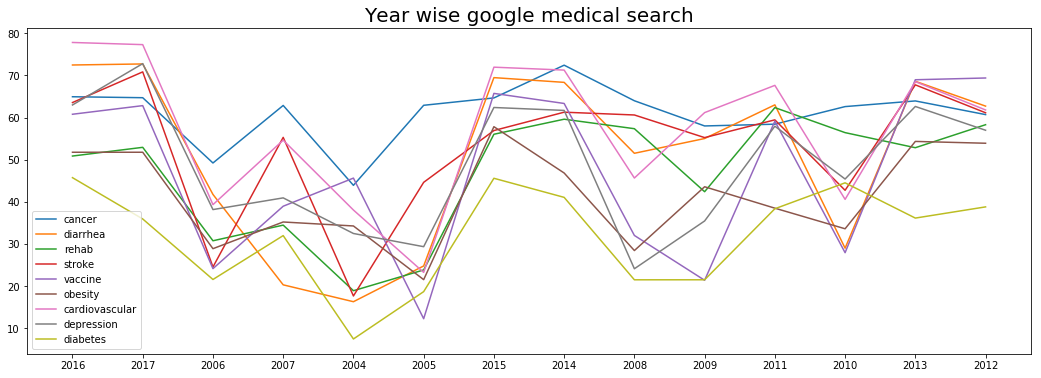

In [4]:
#2004-2017
#cancer cardiovascular stroke depression rehab vaccine diarrhea obesity diabetes
yearWiseMeam = {}
for col in healthSearchData.columns:
    if '+' in col:
        year = col.split('+')[0]
        disease = col.split('+')[-1]
        if not disease in yearWiseMeam:
            yearWiseMeam[disease] = {}
        if not year in yearWiseMeam[disease]:
            yearWiseMeam[disease][year] = np.mean(list(healthSearchData[col]))

plt.figure(figsize=(18, 6))
ax = plt.subplot(111)
plt.title("Year wise google medical search", fontsize=20)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(list(yearWiseMeam['cancer'].keys()))
lh = {}
for disease in yearWiseMeam:
    lh[disease] = plt.plot(yearWiseMeam[disease].values())
plt.legend(lh, loc='best')


It can be observed that the line plot has so many uneven jumps. Let's smooth the plot and visualise how the search looks like. This is just for observational benefits and need not be performed everytime.

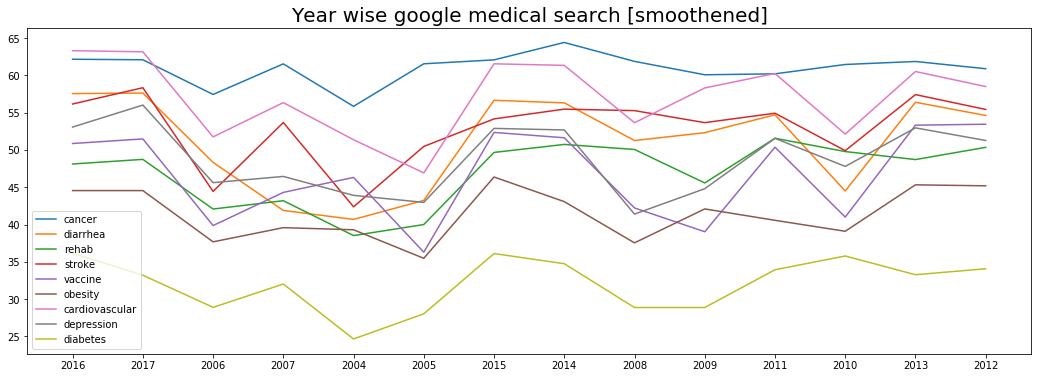

In [5]:
plt.figure(figsize=(18, 6))
ax = plt.subplot(111)
plt.title("Year wise google medical search [smoothened]", fontsize=20)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
ax.set_xticklabels(list(yearWiseMeam['cancer'].keys()))
lh = {}
myLambda = 0.7
for disease in yearWiseMeam:
    tempList = list(yearWiseMeam[disease].values())
    localMean = np.mean(tempList)
    smoothList = []
    for x in tempList:
        smoothList.append(x + myLambda * (localMean - x)) 
    lh[disease] = plt.plot(smoothList)
plt.legend(lh, loc='best')

We see that Cancer is the most searched illness whereas cardiovascular search is the least. Surprisingly, in 2017, diabetes is the highest searched illness. I believe that people are becoming more aware about their health and this can mostly be preemptive search to avoid any future illness. Whatever the case, diabetes has overtaken Cancer in search data.



# Conclusion
# It appears what I thought would be seen in the data came out to be true.There has been an increase of search for health issues every year except for one. Also, the region which is considered the “sickest” (South) has the most searches for health issues, while the region considered the “healthiest” (Northeast) has the least searches.